In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

In [56]:
torch.manual_seed(42)
x = torch.linspace(0 , 10, 100).unsqueeze(1)
y = 5 * x + 10 + torch.randn(x.size()) / 2

In [65]:
class LinearRegreesion(nn.Module) :
    def __init__(self) :
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x) : 
        return self.linear(x)
        

model = LinearRegreesion()

In [66]:
loss_fn = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.01)

In [72]:
for epoch in range(1000) :
    optimizer.zero_grad()
    output = model(x)
    loss = loss_fn(output, y)
    loss.backward()
    optimizer.step()

with torch.no_grad() :
    pred = model(x)

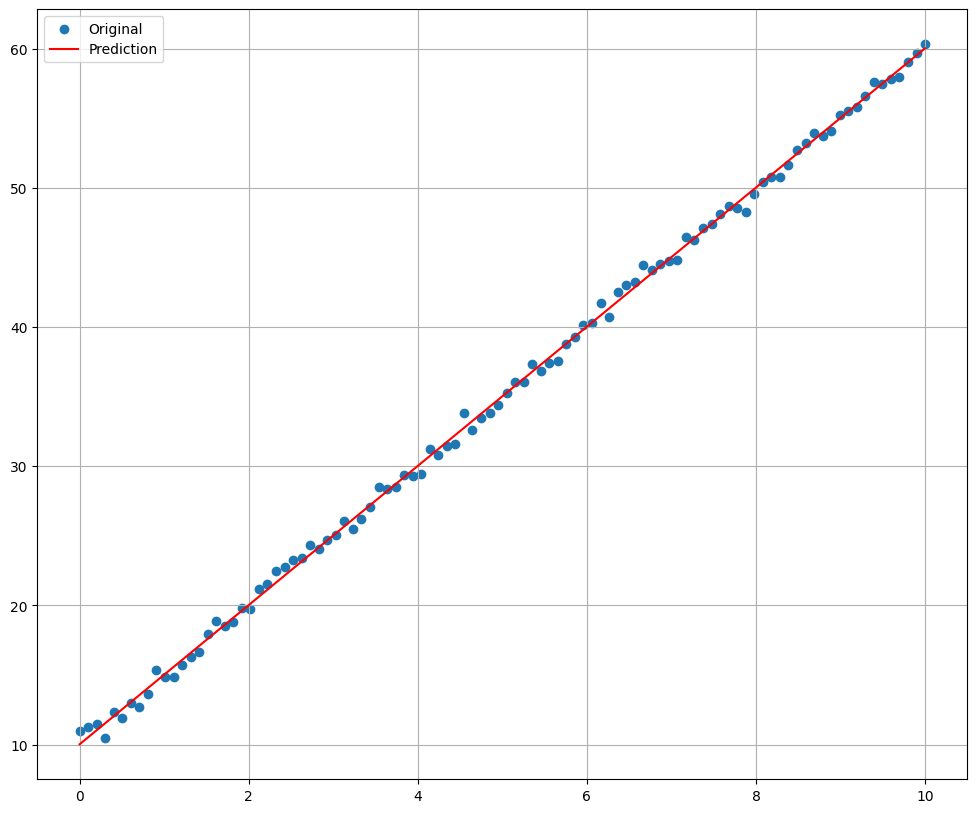

In [78]:
plt.figure(figsize=(12, 10))
plt.scatter(x=x.detach().numpy(), y=y.detach().numpy(), label = 'Original')
plt.plot(x, pred, color = 'red', label = 'Prediction')
plt.grid(True)
plt.legend()
plt.show()